### Compute structure factor for $N=100$

$$ I(k) = \sum_{i=0}^N \sum_{j=0}^N \left\langle \frac{\sin{k ||\vec{R}_i - \vec{R}_j||}}{k ||\vec{R}_i - \vec{R}_j||} \right\rangle$$

### Comparison with Guinier approximation
$$I(k) = (N + 1)^2 \left[1 - \frac{(k R_g)^2}{3} \right]$$

In [16]:
# Library for reading simulation data
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b=3.0
N=100
T=100

# Coordinates arrays
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

# Read simulation data
filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
with open(filename,'r') as f:
    for T in range(T):
        # First 2 lines unnecessary
        lines = f.readline()
        lines = f.readline()
        # Save coordinates and separate in x, y, z
        for i in range(N+1):
            lines = f.readline()
            coord = lines.split()
            x[T,i]=float(coord[1])
            y[T,i]=float(coord[2])
            z[T,i]=float(coord[3])

### Matrix computation

In [17]:
# Variables declaration
step = 0.01
k = np.arange(0, 0.2, step)     # k moment range
Ik = np.ones(len(k)) * (N+1)    # Intensity, I(k)
Ik[0] = (N+1)**2                # I(k=0)
# with diagonal elements already included i=j
Rg2 = b**2 * N / 6              # Radius of gyration squared
Guinier = (N + 1)**2 * (1 - k**2 * Rg2/3)    # Guinier approximation

# Structure factor calculation
for l in range(1, len(k)):
    for i in range(N + 1):
        for j in range(N + 1):
            if j > i:   # Only upper triangular matrix
                arg = k[l] * np.sqrt((x[:, i]-x[:, j])**2 + (y[:, i]-y[:, j])**2 + (z[:, i]-z[:, j])**2)
                Ik[l] += 2 * np.mean(np.sin(arg) / arg)

### Plot $I(k)$

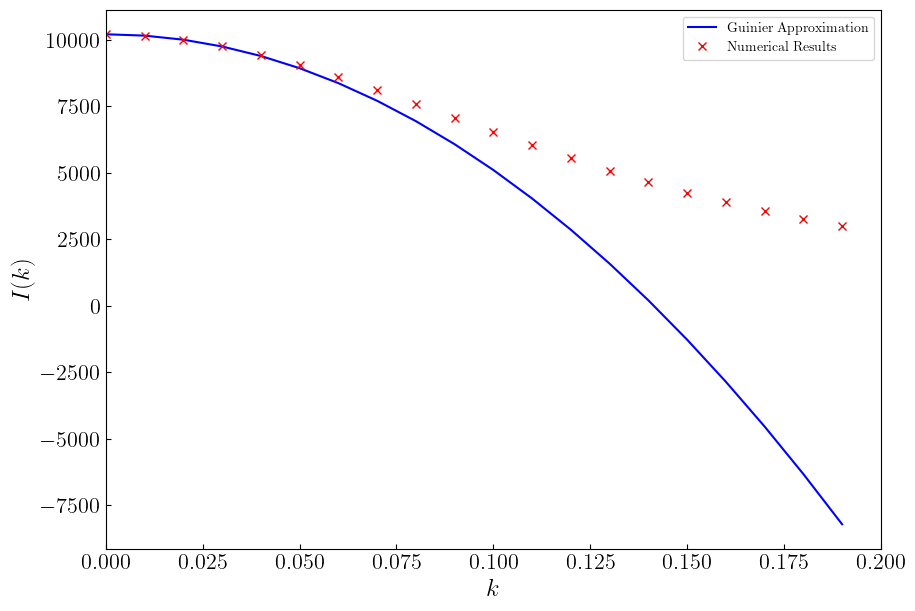

In [18]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10,7))
plt.plot(k, Guinier, 'b-', label=r'Guinier Approximation')
plt.plot(k, Ik, 'rx', label=r'Numerical Results')
plt.xlim(0, 0.2)
# plt.ylim(-1.1 * (N+1)**2, 1.1 * (N+1)**2)
plt.legend()
plt.xlabel(r'$k$', fontsize=18)
plt.ylabel(r'$I(k)$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()

### Plot of Guinier approximation error

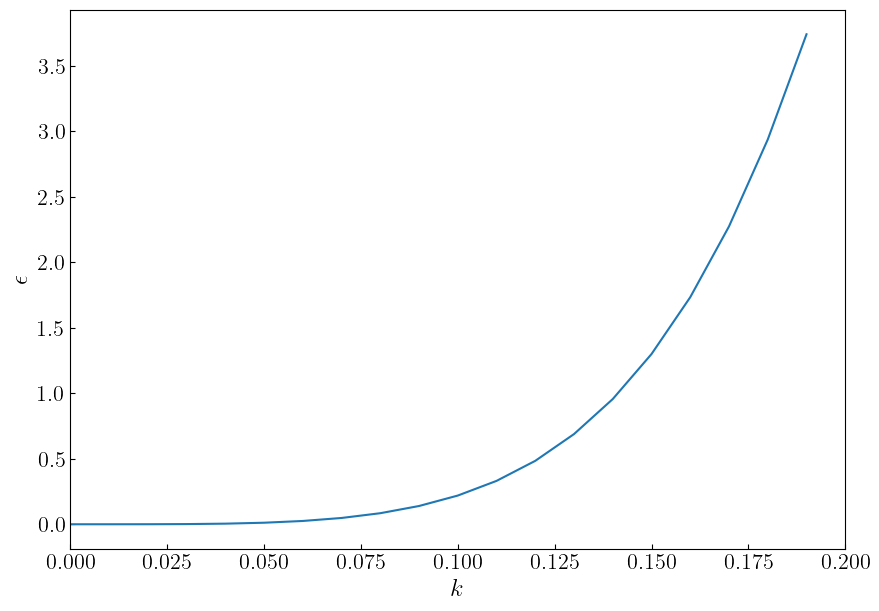

In [19]:
plt.figure(figsize=(10,7))
plt.plot(k, np.abs(Guinier - Ik) / np.abs(Ik))
plt.xlim(0, 0.2)
plt.xlabel(r'$k$', fontsize=18)
plt.ylabel(r'$\epsilon$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()

### $R_g$ estimation and plot

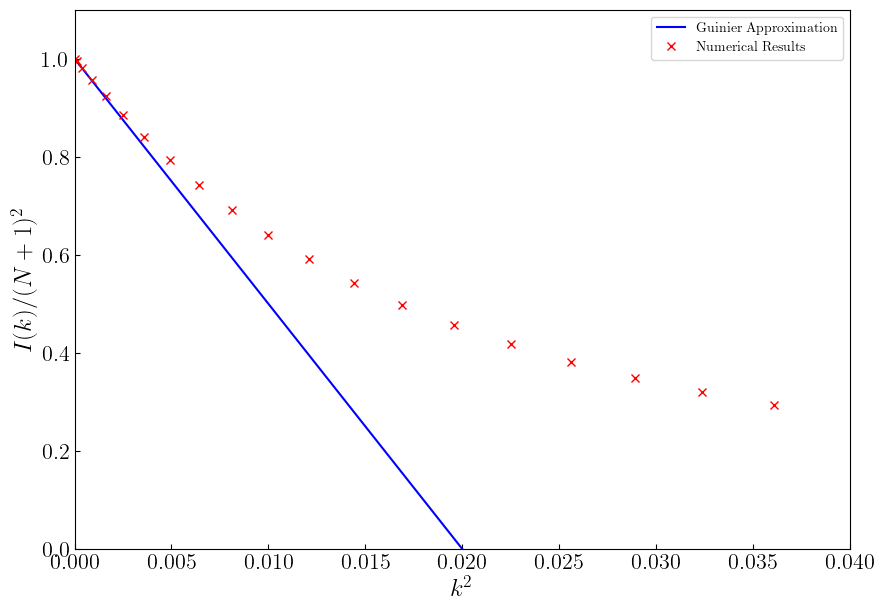

In [20]:
# Redefine k range to k^2
k2 = k**2

Ik2 = Ik / (N+1)**2   # Intensity, I(k^2) and normalize by N+1
Guinier2 = Guinier / (N+1)**2       # Guinier approximation

# Plot
plt.figure(figsize=(10,7))
plt.plot(k2, Guinier2, 'b-', label=r'Guinier Approximation')
plt.plot(k2, Ik2, 'rx', label=r'Numerical Results')
plt.xlim(0, 0.04)
plt.ylim(0, 1.1)
plt.legend()
plt.xlabel(r'$k^2$', fontsize=18)
plt.ylabel(r'$I(k) / (N+1)^2$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()

In [33]:
# Liniar fit of Ik2
fit_index = 5
print('k', k[:fit_index])
print('k^2', k2[:fit_index])
fit = np.polyfit(k2[:fit_index], Ik2[:fit_index], 1)  # Fit Ik2 to a line
print('Fit: ', fit)

Rg2_fit = -3 * fit[0]   # Radius of gyration squared
print(Rg2_fit)

# Compare with Rg2
print(Rg2)

k [0.   0.01 0.02 0.03 0.04]
k^2 [0.     0.0001 0.0004 0.0009 0.0016]
Fit:  [-47.34547726   0.99956797]
142.03643178211178
150.0
